In [83]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [94]:
df_all = pd.read_csv("players_raw.csv")

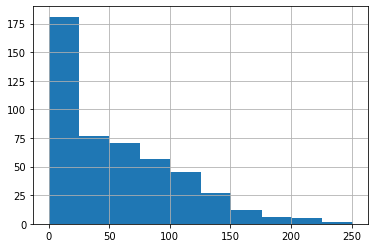

In [95]:
df_all.total_points.hist();

In [96]:
df_all['price_ratio'] = df_all.total_points/df_all.now_cost
df_all.sort_values("price_ratio",ascending=False,inplace=True)

In [97]:
gk = df_all[df_all['element_type']==1]
df = df_all[df_all['element_type']==2]
mid = df_all[df_all['element_type']==3]
fd = df_all[df_all['element_type']==4]

In [98]:
gk[['web_name','price_ratio','total_points','now_cost']].head(10)

,web_name,price_ratio,total_points,now_cost
96,Pope,3.090909,170,55
70,Ryan,3.000000,135,45
305,Henderson,2.909091,160,55
326,Dubravka,2.860000,143,50
194,Schmeichel,2.836364,156,55
461,Patrício,2.781818,153,55
128,Guaita,2.740000,137,50
291,de Gea,2.600000,143,55
363,Ramsdale,2.520000,126,50
157,Pickford,2.340000,117,50


In [99]:
df[['web_name','price_ratio','total_points','now_cost']].head(10)

,web_name,price_ratio,total_points,now_cost
259,Alexander-Arnold,2.800000,210,75
463,Doherty,2.783333,167,60
250,van Dijk,2.738462,178,65
354,Egan,2.660000,133,50
81,Tarkowski,2.600000,143,55
255,Robertson,2.585714,181,70
352,Baldock,2.581818,142,55
348,Stevens,2.581818,142,55
62,Dunk,2.560000,128,50
346,Basham,2.460000,123,50


In [100]:
mid[['web_name','price_ratio','total_points','now_cost']].head(10)

,web_name,price_ratio,total_points,now_cost
356,Lundstram,2.618182,144,55
272,De Bruyne,2.182609,251,115
89,Westwood,2.145455,118,55
37,Grealish,2.128571,149,70
244,Henderson,2.109091,116,55
27,Willian,2.100000,168,80
454,Rice,2.100000,105,50
433,Noble,2.100000,105,50
275,Mahrez,2.058824,175,85
460,Moutinho,2.054545,113,55


In [101]:
fd[['web_name','price_ratio','total_points','now_cost']].head(10)

,web_name,price_ratio,total_points,now_cost
369,Ings,2.329412,198,85
466,Jiménez,2.282353,194,85
303,Martial,2.222222,200,90
140,Ayew,2.200000,132,60
201,Vardy,2.100000,210,100
91,Wood,2.092308,136,65
166,Richarlison,2.062500,165,80
118,Abraham,2.040000,153,75
68,Maupay,2.015385,131,65
164,Calvert-Lewin,1.800000,126,70


In [102]:
money_for_non_bench = 1000-40-40-45-50

In [103]:
money_for_non_bench

825

In [104]:
# maximise this formula
# g + f1 + f2 + m1 + m2 + m3 + m4 + d1 + d2 + d3 + d4 = total points

# with this constraint
# g + f1 + f2 + m1 + m2 + m3 + m4 + d1 + d2 + d3 + d4 < 825 cost

In [112]:
def team_points_and_cost(g1,d1,d2,d3,d4,m1,m2,m3,m4,f1,f2):
    team_points = gk.loc[g1].total_points + df.loc[d1].total_points + df.loc[d2].total_points + \
                    df.loc[d3].total_points + df.loc[d4].total_points + mid.loc[m1].total_points + \
                    mid.loc[m2].total_points + mid.loc[m3].total_points + mid.loc[m4].total_points + \
                    fd.loc[f1].total_points + fd.loc[f2].total_points
    team_cost = gk.loc[g1].now_cost + df.loc[d1].now_cost + df.loc[d2].now_cost + \
                    df.loc[d3].now_cost + df.loc[d4].now_cost + mid.loc[m1].now_cost + \
                    mid.loc[m2].now_cost + mid.loc[m3].now_cost + mid.loc[m4].now_cost + \
                    fd.loc[f1].now_cost + fd.loc[f2].now_cost              
    return team_points, team_cost

In [113]:
mid.loc[356].total_points

144

In [122]:
mid.index[:9]

Int64Index([356, 272, 89, 37, 244, 27, 454, 433, 275], dtype='int64')

In [114]:
team_points_and_cost(96,259,463,250,354,356,272,89,37,369,466)

(1912, 770)

In [140]:
best_team={}
best_points = 0
cost_max = 825
for g in gk.index[:6]:
    for n, d1 in enumerate(df.index[:6]):
        print(n,"def1-------")
        for n2, d2 in enumerate(df.index[n+1:7]):
            print(n,"def2")
            for n3, d3 in enumerate(df.index[n+n2+2:8]):
                for d4 in df.index[n+n2+n3+3:9]:
                    for n4, m1 in enumerate(mid.index[:6]):
                        for n5, m2 in enumerate(mid.index[n4+1:7]):
                            for n6, m3 in enumerate(mid.index[n4+n5+2:8]):
                                for m4 in mid.index[n4+n5+n6+3:9]:
                                    for n7, f1 in enumerate(fd.index[:6]):
                                        for f2 in fd.index[n7+1:7]:
                                                p, c = team_points_and_cost(g,d,d2,d3,d4,m1,m2,m3,m4,f1,f2)
                                                if p > best_points and c < cost_max:
                                                    best_points = p
                                                    best_team['best'] = [[g,d,d2,d3,d4,m1,m2,m3,m4,f1,f2],p,c]
                                                    print("New_best_team=", [[g,d,d2,d3,d4,m1,m2,m3,m4,f1,f2],p,c])

0 def1-------
0 def2
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 37, 369, 466], 1826, 750]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 37, 369, 303], 1832, 755]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 37, 369, 201], 1842, 765]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 37, 303, 201], 1844, 770]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 27, 369, 466], 1845, 760]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 27, 369, 303], 1851, 765]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 27, 369, 201], 1861, 775]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 27, 303, 201], 1863, 780]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 275, 369, 201], 1868, 780]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 89, 275, 303, 201], 1870, 785]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 37, 27, 369, 466], 1876, 775]
New_best_team= [[96, 393, 463, 250, 354, 356, 272, 37, 27, 369, 303], 1882, 780]
New_b

In [141]:
best_team

{'best': [[96, 393, 463, 250, 255, 356, 272, 27, 275, 369, 303], 1956, 815]}

In [138]:
for n, i in enumerate(range(6)):
    for n2, j in enumerate(range(n+1,6)):
        for k in range (n+n2+2,6):
            print(i,j,k)

0 1 2
0 1 3
0 1 4
0 1 5
0 2 3
0 2 4
0 2 5
0 3 4
0 3 5
0 4 5
1 2 3
1 2 4
1 2 5
1 3 4
1 3 5
1 4 5
2 3 4
2 3 5
2 4 5
3 4 5


255239184